# Setup 1
* libraries
* pandas.read_csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import requests
from bs4 import BeautifulSoup
from requests.exceptions import ConnectionError, Timeout, RequestException

In [2]:
os.listdir('../data')

['.DS_Store', 'cleaned_players.csv', 'df_eng.csv']

In [3]:
df = pd.read_csv('../data/cleaned_players.csv', index_col = 0)
df.head()

,id_players,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,76.0,left,high,medium,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
47,3,Aaron Doran,1991-05-13 00:00:00,170.18,163,71.0,78.0,right,medium,medium,...,72.0,63.0,22.0,21.0,21.0,15.0,10.0,11.0,8.0,12.0
83,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198,75.0,82.0,right,medium,high,...,54.0,60.0,80.0,78.0,70.0,14.0,11.0,65.0,11.0,10.0
106,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154,78.0,81.0,right,medium,medium,...,60.0,81.0,82.0,83.0,77.0,12.0,20.0,57.0,20.0,20.0


# Preprocessing
* id_players from int64 to object
* preferred_foot encoded (left:0, right:1)
* attacking_work_rate encoded (low:0, medium:1, high:2)
* defensive_work_rate encoded (low:0, medium:1, high:2)

In [4]:
# Initial Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9844 entries, 0 to 183972
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_players           9844 non-null   int64  
 1   player_name          9844 non-null   object 
 2   birthday             9844 non-null   object 
 3   height               9844 non-null   float64
 4   weight               9844 non-null   int64  
 5   overall_rating       9844 non-null   float64
 6   potential            9844 non-null   float64
 7   preferred_foot       9844 non-null   object 
 8   attacking_work_rate  9844 non-null   object 
 9   defensive_work_rate  9844 non-null   object 
 10  crossing             9844 non-null   float64
 11  finishing            9844 non-null   float64
 12  heading_accuracy     9844 non-null   float64
 13  short_passing        9844 non-null   float64
 14  volleys              9844 non-null   float64
 15  dribbling            9844 non-null   floa

In [5]:
# Let's convert ID to object so that it does not interfere with our calculations
df['id_players'] = df['id_players'].astype('object')

# Mapping dictionaries
foot_mapping = {
    'left': 0,
    'right': 1
}

workrate_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

# Convert the columns
df['preferred_foot'] = df['preferred_foot'].replace(foot_mapping)
df['attacking_work_rate'] = df['attacking_work_rate'].replace(workrate_mapping) 
df['defensive_work_rate'] = df['defensive_work_rate'].replace(workrate_mapping)

# Check the value counts to see if the encoding worked
print(df['preferred_foot'].value_counts())
print()
print(df['attacking_work_rate'].value_counts())
print()
print(df['defensive_work_rate'].value_counts())

preferred_foot
1    7437
0    2407
Name: count, dtype: int64

attacking_work_rate
1       6871
2       2388
0        489
norm      55
le        14
stoc      14
y         13
Name: count, dtype: int64

defensive_work_rate
1        7315
2        1519
0         903
ormal      55
ean        14
tocky      14
es         13
9           2
4           2
5           2
6           2
1           1
2           1
3           1
Name: count, dtype: int64


/var/folders/xs/s4fj4wdx6f7fkjpgcmjzz2lc0000gn/T/ipykernel_1797/703262197.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['preferred_foot'] = df['preferred_foot'].replace(foot_mapping)


* We have a lot of invalid values for defensive and attacking work rate which are small enough for us to remove
* We will remove this from our dataset so that we can continue the analysis

In [6]:
valid_values = [0, 1, 2]

# Filtering only the valid values in both columns
df = df[df['attacking_work_rate'].isin(valid_values)]
df = df[df['defensive_work_rate'].isin(valid_values)]

# Converting from object to integer
df['attacking_work_rate'] = df['attacking_work_rate'].astype('int64')
df['defensive_work_rate'] = df['defensive_work_rate'].astype('int64')


In [7]:
# New Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9737 entries, 0 to 183972
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_players           9737 non-null   object 
 1   player_name          9737 non-null   object 
 2   birthday             9737 non-null   object 
 3   height               9737 non-null   float64
 4   weight               9737 non-null   int64  
 5   overall_rating       9737 non-null   float64
 6   potential            9737 non-null   float64
 7   preferred_foot       9737 non-null   int64  
 8   attacking_work_rate  9737 non-null   int64  
 9   defensive_work_rate  9737 non-null   int64  
 10  crossing             9737 non-null   float64
 11  finishing            9737 non-null   float64
 12  heading_accuracy     9737 non-null   float64
 13  short_passing        9737 non-null   float64
 14  volleys              9737 non-null   float64
 15  dribbling            9737 non-null   floa

# Feature Engineering
1. birth_year instead of birthday
2. age 
3. position (webscraping transfermarkt.com)
4. country (webscraping transfermarkt.com)

In [8]:
# Convert birthday to datetime if not already
df['birthday'] = pd.to_datetime(df['birthday'])

# Extract year
df['birth_year'] = df['birthday'].dt.year

# Calculate age (as of 2024)
current_year = 2024
df['age'] = current_year - df['birth_year']

# Drop original birthday column if no longer needed
df = df.drop('birthday', axis=1)

In [10]:
# Wescraping Countries and Positions of players
countries = []
positions = []
n = len(df)

for i in range(n):
    player_name = df.iloc[i]['player_name'].lower()
    search_url = f"https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={'+'.join(player_name.split())}"
    
    try:
        response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract position
        position_td = soup.find('td', class_='zentriert')
        position = position_td.get_text(strip=True) if position_td else "NA"

        # Extract country
        country_img_tag = soup.find('img', class_='flaggenrahmen')
        country_name = country_img_tag.get('title') if country_img_tag else "NA"

        # Append the extracted information to the list
        countries.append(country_name)
        positions.append(position)
        print(f"Player {i+1}/{n} Found! Position: {position}, Country: {country_name}")
    
    except (ConnectionError, Timeout) as e:
        countries.append(np.nan)
        positions.append(np.nan)
        print(f"Player {i+1}/{n} Failed due to connection issue: {e}")
    
    except Exception as e:
        countries.append(np.nan)
        positions.append(np.nan)
        print(f"Player {i+1}/{n} Failed due to unexpected error: {e}")


Player 1/9737 Found! Position: CB, Country: Gabon
Player 2/9737 Found! Position: LB, Country: England
Player 3/9737 Found! Position: RM, Country: Ireland
Player 4/9737 Found! Position: CB, Country: Mexico
Player 5/9737 Found! Position: CB, Country: Northern Ireland
Player 6/9737 Found! Position: AM, Country: Germany
Player 7/9737 Found! Position: CM, Country: England
Player 8/9737 Found! Position: RW, Country: England
Player 9/9737 Found! Position: GK, Country: Australia
Player 10/9737 Found! Position: LB, Country: Netherlands
Player 11/9737 Found! Position: CB, Country: South Africa
Player 12/9737 Found! Position: CM, Country: Australia
Player 13/9737 Found! Position: RB, Country: Scotland
Player 14/9737 Found! Position: RW, Country: Spain
Player 15/9737 Found! Position: CM, Country: Wales
Player 16/9737 Found! Position: CM, Country: Scotland
Player 17/9737 Found! Position: LB, Country: Antigua and Barbuda
Player 18/9737 Found! Position: CF, Country: England
Player 19/9737 Found! Posi

In [13]:
# Saving the new features as columns in the df
df['position'] = positions
df['country'] = countries

In [10]:
# There are some players who were not found on the website
df[['position', 'country']].isnull().sum()

position    544
country     545
dtype: int64

In [11]:
# let's remove the NAs from this
# we already removed the previous NAs, so we can simply drop all NAs
df = df.dropna()

In [26]:
# Overwriting the new dataframe
df.to_csv('../data/cleaned_players_2.csv', index=False)

# Setup 2

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [34]:
df = pd.read_csv('../data/cleaned_players_2.csv', index_col = 0)
df.head()

,player_name,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,age,position,country
id_players,,,,,,,,,,,,,,,,,,,,,
1,Aaron Appindangoye,182.88,187,67.0,71.0,1,1,1,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,1992,32,CB,Gabon
2,Aaron Cresswell,170.18,146,74.0,76.0,0,2,1,80.0,53.0,...,78.0,14.0,7.0,9.0,9.0,12.0,1989,35,LB,England
3,Aaron Doran,170.18,163,71.0,78.0,1,1,1,73.0,52.0,...,21.0,15.0,10.0,11.0,8.0,12.0,1991,33,RM,Ireland
4,Aaron Galindo,182.88,198,75.0,82.0,1,1,2,60.0,44.0,...,70.0,14.0,11.0,65.0,11.0,10.0,1982,42,CB,Mexico
5,Aaron Hughes,182.88,154,78.0,81.0,1,1,1,45.0,57.0,...,77.0,12.0,20.0,57.0,20.0,20.0,1979,45,CB,Northern Ireland


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9192 entries, 1 to 11075
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          9192 non-null   object 
 1   height               9192 non-null   float64
 2   weight               9192 non-null   int64  
 3   overall_rating       9192 non-null   float64
 4   potential            9192 non-null   float64
 5   preferred_foot       9192 non-null   int64  
 6   attacking_work_rate  9192 non-null   int64  
 7   defensive_work_rate  9192 non-null   int64  
 8   crossing             9192 non-null   float64
 9   finishing            9192 non-null   float64
 10  heading_accuracy     9192 non-null   float64
 11  short_passing        9192 non-null   float64
 12  volleys              9192 non-null   float64
 13  dribbling            9192 non-null   float64
 14  curve                9192 non-null   float64
 15  free_kick_accuracy   9192 non-null   float

# Question 1
* Question: Are there distinct player types (e.g., playmakers, defenders) based on specific attribute clusters? How do these types affect team dynamics? 
* Rationale: A client in team management could use this to balance and optimize team composition by understanding distinct player roles and strengths. 

In [155]:
# Define attribute groups
attacking_attrs = ['finishing', 'shot_power', 'volleys', 'dribbling', 'ball_control', 'acceleration', 'sprint_speed']
midfield_attrs = ['short_passing', 'ball_control', 'vision', 'stamina', 'interceptions']
defensive_attrs = ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'strength']
goalkeeper_attrs = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

In [159]:
# Combine all attributes for clustering
all_attrs = list(set(attacking_attrs + midfield_attrs + defensive_attrs + goalkeeper_attrs))

# Prepare data for clustering
X = df[all_attrs]

In [160]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering (k=9 for 3 positions × 3 styles)
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster')[all_attrs].mean()

In [161]:
# Function to identify cluster characteristics
def identify_cluster_type(cluster_means_row):
    attack_score = cluster_means_row[attacking_attrs].mean()
    midfield_score = cluster_means_row[midfield_attrs].mean()
    defense_score = cluster_means_row[defensive_attrs].mean()
    goalkeeper_score = cluster_means_row[goalkeeper_attrs].mean()
    
    
    if goalkeeper_score > 50:  
        return "Goalkeeper"
    
    # For other positions
    scores = [attack_score, midfield_score, defense_score]
    max_score = max(scores)
    
    if max_score == attack_score:
        position = "Forward"
    elif max_score == midfield_score:
        position = "Midfielder"
    else:
        position = "Defender"
        
    if attack_score > defense_score:
        style = "Attacking"
    elif defense_score > attack_score:
        style = "Defensive"
    else:
        style = "Balanced"
        
    return f"{position} ({style})"

In [163]:
cluster_means = df.groupby('Cluster')[all_attrs].mean()
cluster_types = {}
for cluster in range(10):
    cluster_types[cluster] = identify_cluster_type(cluster_means.loc[cluster])

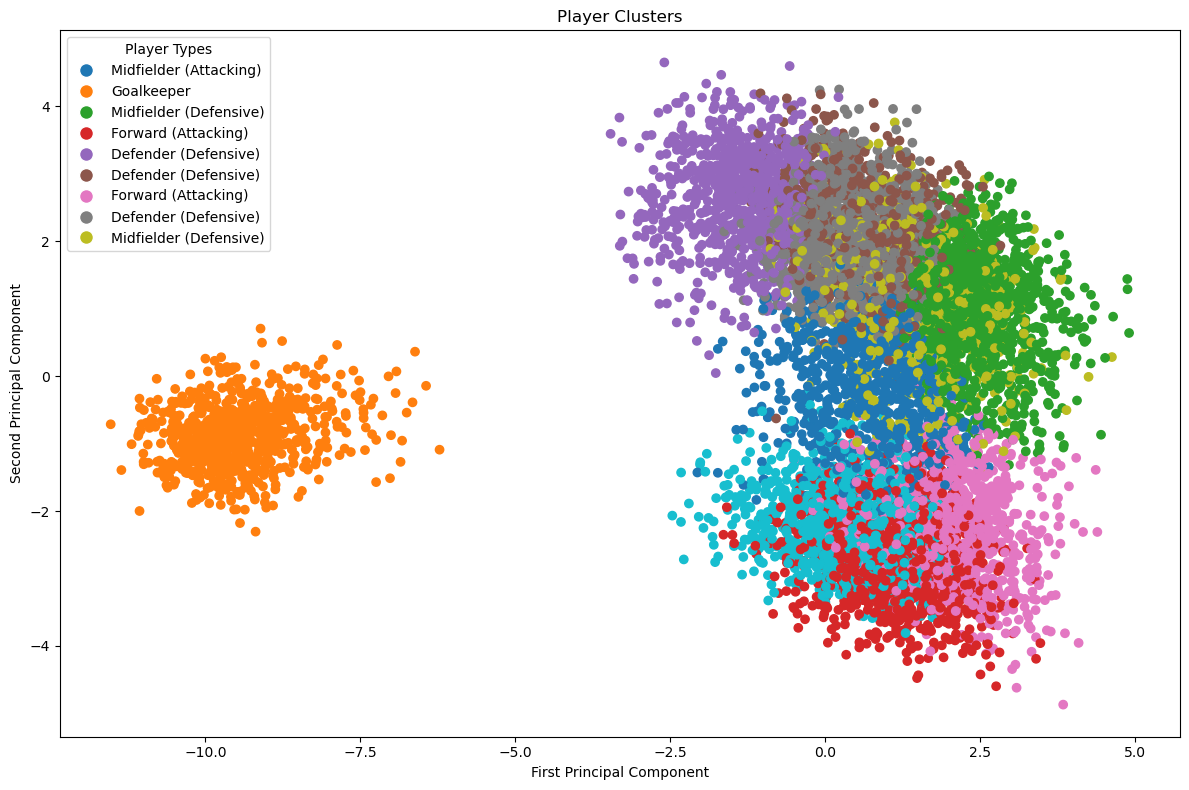

In [165]:
# Add position and style labels to dataframe
df['Player_Type'] = df['Cluster'].map(cluster_types)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10')
plt.title('Player Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=scatter.cmap(scatter.norm(i)),
                            label=cluster_types[i], markersize=10)
                  for i in range(9)]
plt.legend(handles=legend_elements, title='Player Types')
plt.tight_layout()
plt.show()

In [166]:
# Print top 10 players from each cluster sorted by overall rating
for cluster in range(9):
    print(f"\n\nCluster {cluster} - {cluster_types[cluster]}:")
    print("-" * 50)
    
    # Get top 10 players from this cluster
    cluster_players = df[df['Cluster'] == cluster].nlargest(10, 'overall_rating')
    
    # Display player names and key attributes based on position type
    if cluster_types[cluster].startswith('Forward'):
        relevant_attrs = attacking_attrs
    elif cluster_types[cluster].startswith('Midfielder'):
        relevant_attrs = midfield_attrs
    else:
        relevant_attrs = defensive_attrs
    
    # Print players and their key attributes
    display_cols = ['player_name', 'overall_rating'] + relevant_attrs
    print(cluster_players[display_cols].to_string())



Cluster 0 - Midfielder (Attacking):
--------------------------------------------------
                player_name  overall_rating  short_passing  ball_control  vision  stamina  interceptions
id_players                                                                                              
4972             Joan Verdu            80.0           84.0          80.0    87.0     56.0           49.0
1569         Carlos Martins            79.0           82.0          80.0    84.0     60.0           61.0
8125          Oliver Torres            79.0           84.0          83.0    85.0     68.0           70.0
3374           Filip Trojan            78.0           70.0          84.0    70.0     68.0           64.0
6087             Leon Osman            78.0           76.0          81.0    79.0     69.0           54.0
362          Alen Halilovic            77.0           80.0          77.0    81.0     70.0           55.0
2439         David Zurutuza            77.0           85.0          76.

In [167]:
def find_random_player_by_style(position, style=None, df=df, cluster_types=cluster_types):

    # Get matching clusters based on position and style
    matching_clusters = []
    for cluster, type_name in cluster_types.items():
        if position == 'Goalkeeper' and type_name == 'Goalkeeper':
            matching_clusters.append(cluster)
        elif position in type_name and (style is None or style in type_name):
            matching_clusters.append(cluster)
    
    if not matching_clusters:
        return f"No players found for {position} {style if style else ''}"
    
    # Get players from matching clusters
    matching_players = df[df['Cluster'].isin(matching_clusters)]
    
    # Select random player
    random_player = matching_players.sample(n=1)
    
    # Get relevant attributes
    if position == 'Goalkeeper':
        relevant_attrs = goalkeeper_attrs
    elif position == 'Forward':
        relevant_attrs = attacking_attrs
    elif position == 'Midfielder':
        relevant_attrs = midfield_attrs
    else:
        relevant_attrs = defensive_attrs
    
    display_cols = ['player_name', 'overall_rating'] + relevant_attrs
    return random_player[display_cols]

In [168]:
print("Random Attacking Forward:")
print(find_random_player_by_style('Forward', 'Attacking'))

Random Attacking Forward:
               player_name  overall_rating  finishing  shot_power  volleys  \
id_players                                                                   
3703        Gaston Ramirez            80.0       75.0        77.0     75.0   

            dribbling  ball_control  acceleration  sprint_speed  
id_players                                                       
3703             85.0          86.0          77.0          79.0  


In [169]:
print("\nRandom Defensive Midfielder:")
print(find_random_player_by_style('Midfielder', 'Defensive'))


Random Defensive Midfielder:
            player_name  overall_rating  short_passing  ball_control  vision  \
id_players                                                                     
1701        Chris Baird            75.0           77.0          67.0    68.0   

            stamina  interceptions  
id_players                          
1701           77.0           73.0  


In [170]:
print("\nRandom Goalkeeper:")
print(find_random_player_by_style('Goalkeeper'))


Random Goalkeeper:
              player_name  overall_rating  gk_diving  gk_handling  gk_kicking  \
id_players                                                                      
8285        Paolo Acerbis            70.0       70.0         70.0        67.0   

            gk_positioning  gk_reflexes  
id_players                               
8285                  73.0         69.0  


# Question 2
- Question: How do specific attributes correlate with overall player rating? 
- Rationale: For a client in sports management or a team looking to recruit, understanding which attributes drive player success is crucial. This analysis could highlight the most critical skills for high performance. 

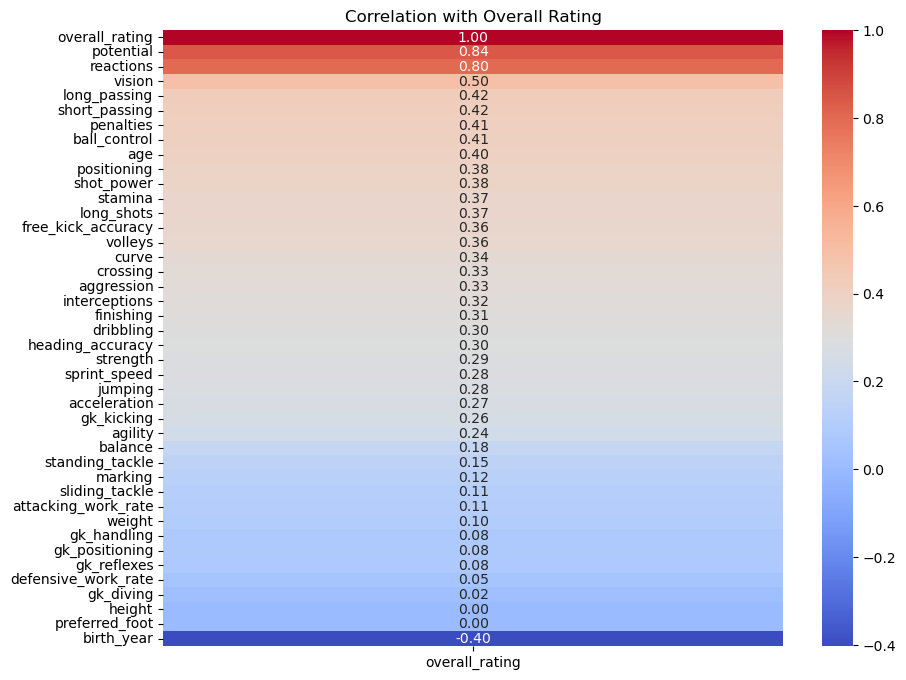

In [36]:
# Compute correlation
correlation = df.corr(numeric_only=True)['overall_rating'].sort_values(ascending=False)

# Plot heatmap for `overall_rating`
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation with Overall Rating')
plt.show()


* potential is highly correlated with overall_rating
* the heatmap suggest that elite players could tend to have high level reactions
* playmaking attributes *(vision, long_passing, short_passing)* are the next most related attributes to overall_rating

In [37]:
# Aggregating the overall based on work rates
df.groupby(['defensive_work_rate', 'attacking_work_rate']).agg({'overall_rating': ['min', 'mean', 'max']})

overall_rating                 
                                                   min       mean   max
defensive_work_rate attacking_work_rate                                
0                   0                             64.0  73.866667  86.0
                    1                             54.0  72.572993  94.0
                    2                             52.0  72.410256  93.0
1                   0                             52.0  70.926641  88.0
                    1                             47.0  69.546422  93.0
                    2                             49.0  72.134139  91.0
2                   0                             52.0  72.172414  87.0
                    1                             48.0  72.252682  91.0
                    2                             58.0  74.508274  93.0

* The combinations of work rates have very mixed results which suggest that there are highly rated players of all play styles

In [42]:
# Finding the average overall_rating per position
df.groupby('position').agg({'overall_rating': ['min', 'mean', 'max']})

overall_rating                 
                    min       mean   max
position                                
AM                 48.0  71.508065  90.0
Attack             55.0  65.642857  75.0
CB                 48.0  70.608844  91.0
CF                 50.0  71.638255  93.0
CM                 51.0  71.159406  92.0
DM                 47.0  70.647587  88.0
Defender           59.0  70.916667  81.0
GK                 48.0  70.538953  93.0
LB                 49.0  69.875389  89.0
LM                 52.0  69.661972  90.0
LW                 53.0  71.256236  91.0
Midfield           52.0  60.916667  73.0
RB                 48.0  69.821162  87.0
RM                 52.0  68.403361  86.0
RW                 54.0  71.409465  94.0
SS                 49.0  74.127660  90.0
SW                 75.0  75.000000  75.0

* On average, players with a more specific position have higher ratings
    * SS - 74
    * SW - 75
* On the other hand, players that were labeled with a more general position tend to have a lower average rating
    * Attack - 65
    * Defender - 71
    * Midfield - 61

# Question 3
- Question: What combination of physical and technical attributes defines the top-performing players? 
- Rationale: This would help a client (like a sports academy) identify attributes to target when training or recruiting players, creating a blueprint for high-potential profiles. 

In [66]:
# Physical Attributes
speed = ['sprint_speed', 'acceleration', 'agility']
strength = ['jumping', 'stamina', 'strength', 'shot_power']

# Playmakers and Technical Players
playmaking = ['short_passing', 'crossing', 'long_passing', 'vision']
technical = ['ball_control', 'dribbling']

count    2239.000000
mean       74.233140
std         6.513281
min        52.000000
25%        70.000000
50%        74.000000
75%        79.000000
max        94.000000
Name: overall_rating, dtype: float64

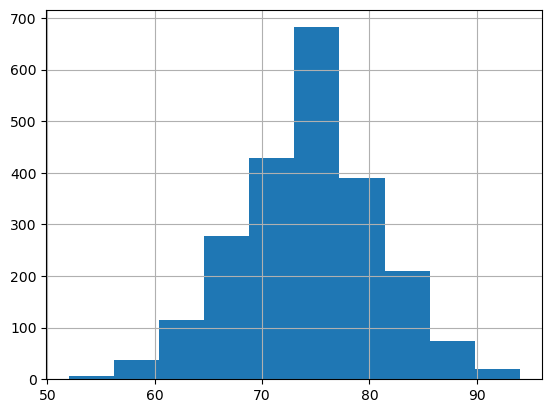

In [67]:
# Quick Players (Speed Attributes more than 80)
quick_players = df[df[speed].gt(80).any(axis=1)]
quick_players['overall_rating'].hist();
quick_players['overall_rating'].describe()

count    3299.000000
mean       74.488633
std         6.243938
min        50.000000
25%        70.000000
50%        75.000000
75%        79.000000
max        93.000000
Name: overall_rating, dtype: float64

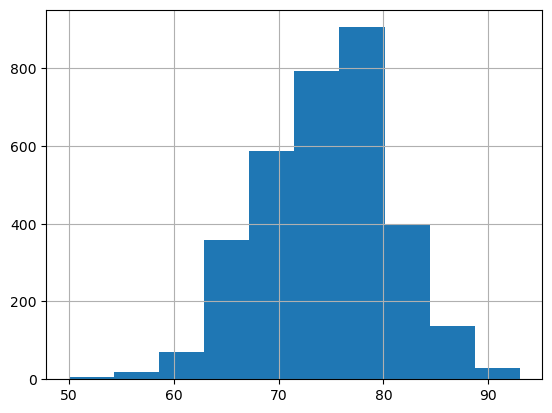

In [68]:
# Strong Players (Strength Attributes more than 80)
strong_players = df[df[strength].gt(80).any(axis=1)]
strong_players['overall_rating'].hist();
strong_players['overall_rating'].describe()

count    929.000000
mean      80.118407
std        4.242511
min       67.000000
25%       77.000000
50%       80.000000
75%       83.000000
max       94.000000
Name: overall_rating, dtype: float64

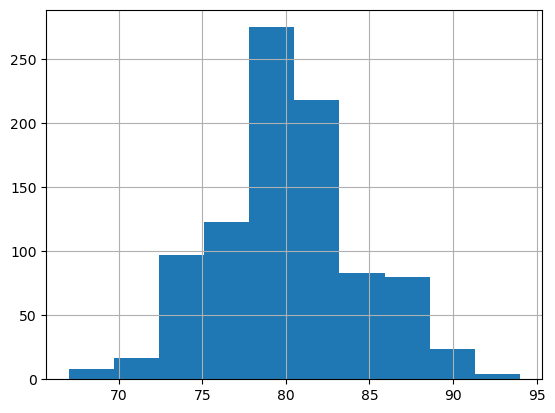

In [69]:
# Technical Players (Technical Attributes more than 80)
technical_players = df[df[technical].gt(80).any(axis=1)]
technical_players['overall_rating'].hist();
technical_players['overall_rating'].describe()

count    882.000000
mean      79.888889
std        4.126423
min       68.000000
25%       77.000000
50%       80.000000
75%       83.000000
max       94.000000
Name: overall_rating, dtype: float64

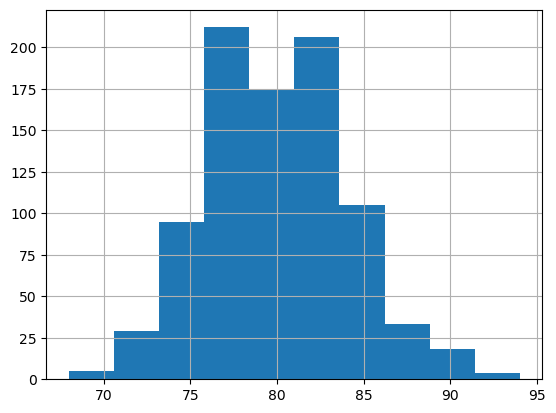

In [70]:
# Playmaking Players (Technical Attributes more than 80)
playmaking_players = df[df[playmaking].gt(80).any(axis=1)]
playmaking_players['overall_rating'].hist();
playmaking_players['overall_rating'].describe()

* Strong and Fast players on average have similar overall_rating distributions with an average around 74.
* Playmakers and Technical players have a higher average overall_ratiing around 80.
* This could point to the importance of these types of players in a team.

In [74]:
df['is_quick'] = df[speed].gt(80).any(axis=1).astype(int)
df['is_strong'] = df[strength].gt(80).any(axis=1).astype(int)
df['is_technical'] = df[technical].gt(80).any(axis=1).astype(int)
df['is_playmaker'] = df[playmaking].gt(80).any(axis=1).astype(int)
df['world_class'] = df['overall_rating'] > 85

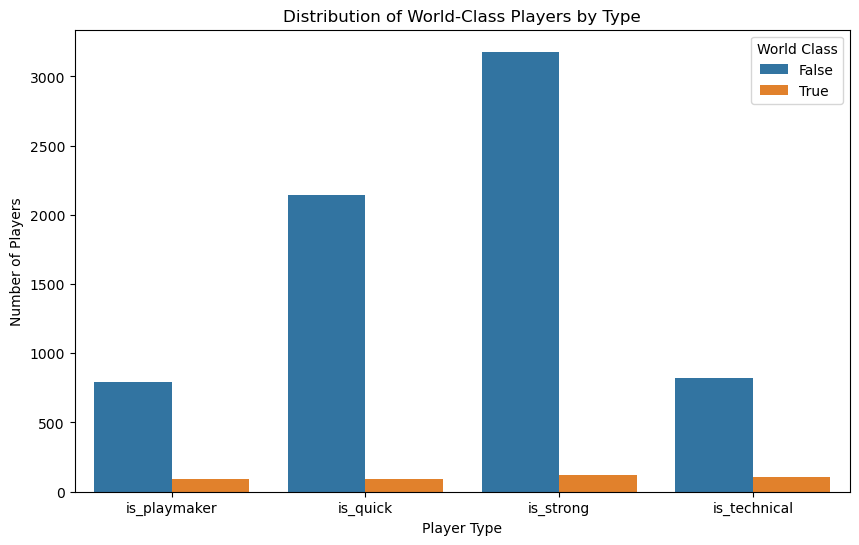

In [83]:
# Melt the df to organize it easier for analysis
player_types = ['is_quick', 'is_strong', 'is_technical', 'is_playmaker']
melted = df.melt(id_vars=['world_class'], value_vars=player_types, 
                 var_name='Player Type', value_name='Has Attribute')

# Group by world_class and player type
grouped = melted.groupby(['world_class', 'Player Type'])['Has Attribute'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Player Type', y='Has Attribute', hue='world_class')
plt.title('Distribution of World-Class Players by Type')
plt.ylabel('Number of Players')
plt.xlabel('Player Type')
plt.legend(title='World Class')
plt.show()

* They all have a similar number of World Class players but proportionally, playmakers and technical players have a better percentage of World Class players. 

# Question 4
* Question: What factors influence a player's potential rating, and how accurately can it predict future performance? 
* Rationale: This could assist in scouting and investment decisions for clients, focusing on young players who may grow into valuable assets. 

In [123]:
# Let's filter out the older players so that we can fit a model for young talents
young = df[df['age'] < 30]

In [125]:
X = young.drop(columns=['player_name', 'birth_year', 'country', 'world_class', 'potential', 'position', 'overall_rating'])
y = young['potential']
X = sm.add_constant(X)
model = sm.OLS(np.array(y), np.array(X)).fit()

In [126]:
# Linear Regression to predict y = potential
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     39.45
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          8.04e-147
Time:                        14:43:28   Log-Likelihood:                -1692.7
No. Observations:                 649   AIC:                             3473.
Df Residuals:                     605   BIC:                             3670.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.1896      9.850      6.110      0.0

* The biggest coefficients are for x39, x40, x42, and x43

In [128]:
for x in [39, 40, 42, 43]:
    print(X.columns[x])

age
is_quick
is_technical
is_playmaker


* x39 (age) is an influential coefficient which is **negative** indicating that the older a player gets, the less potential they have to increase in overall rating.
* x40 (quick players) is the biggest coefficient in absolute value showing that it has the biggest positive impact on overall rating.
* x42 and x43 (technical and playmakers) suggests that technical and playmaker playstyles may hint to a high potential among young players.

In [129]:
# NOTE! 
# Improve model later for better R2
# Add and remove variables (LASSO REGRESSION!)
# Some variables are not as impactful and we may be overfitting to the young players
# Predict for young players who improved since the dataset

In [202]:
df.corr(numeric_only = True)['potential'].sort_values(ascending = False).head(10)

potential         1.000000
overall_rating    0.842297
reactions         0.671149
vision            0.460524
is_technical      0.429097
ball_control      0.407802
short_passing     0.390629
penalties         0.382339
is_playmaker      0.380305
positioning       0.377082
Name: potential, dtype: float64

* The 10 variables with the most positive correlation towards potential

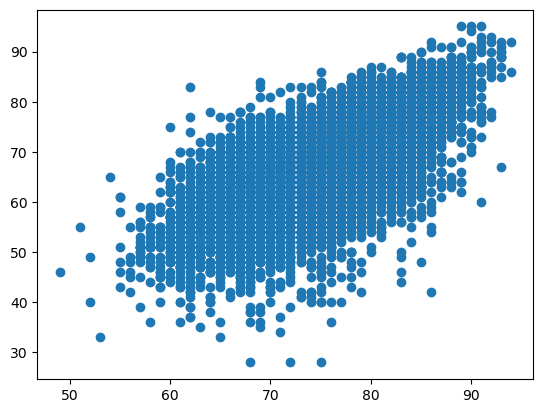

In [203]:
# Scatterplot
plt.scatter(df['potential'], df['reactions'])

* As your reaction skills increase, there is a notable positive relationship with increased potential.
* This idea was also indicated by our findings with overall_rating in Question 1.

# Question 5
* Question: Which skills show the most improvement with player experience or age? 
* Rationale: This could guide a training organization on which skills to focus on at different player development stages, aligning with age or experience. 

count    9192.000000
mean       36.713338
std         5.136603
min        25.000000
25%        33.000000
50%        36.000000
75%        40.000000
max        55.000000
Name: age, dtype: float64

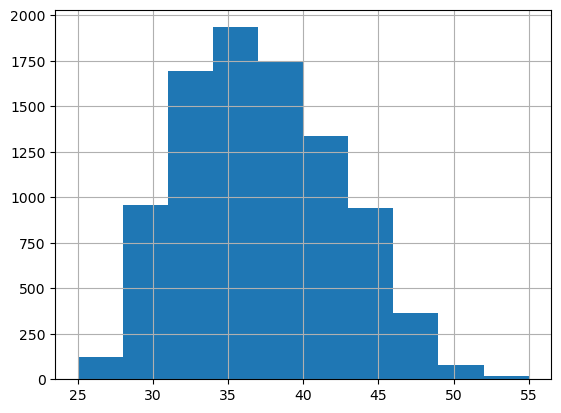

In [173]:
df['age'].hist();
df['age'].describe()

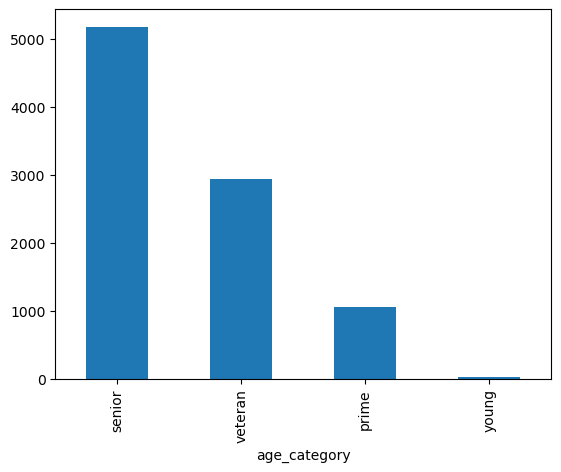

In [174]:
# Let's create age ranges for the players
    # 26 and below = young
    # 27 to 30 = prime
    # 31 to 35 = veteran
    # 36 + = senior

df['age_category'] = pd.cut(df['age'],
                            bins=[0, 26, 30, 35, np.inf],  
                            labels=['young', 'prime', 'veteran', 'senior'])
df['age_category'].value_counts().plot(kind = 'bar');

* Because this dataset comes from an earlier version of the FIFA games, most of the players are currently in the senior category.

In [184]:
df.corr(numeric_only=True)['age'].sort_values(ascending = False).head(5)

age               1.000000
gk_kicking        0.456949
overall_rating    0.402570
reactions         0.299402
strength          0.269103
Name: age, dtype: float64

* Here we check which variables have the strongest positive relationship with age.
* According to the pearson correlations, goalkeeper kicking is the attribute that improves the most with age.

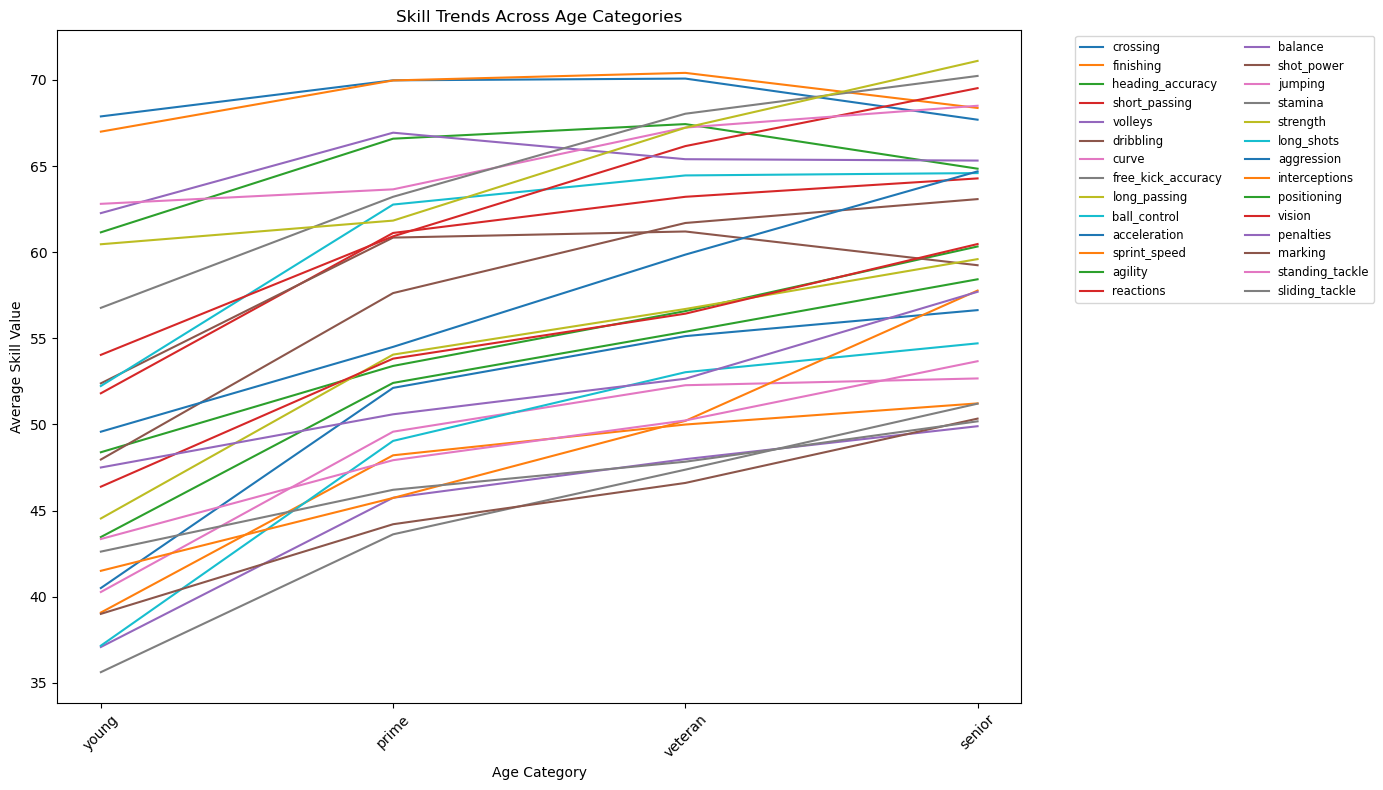

In [186]:
# Attributes Columns
skill_columns = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'marking', 'standing_tackle', 'sliding_tackle'
]

# Group by age_category and calculate mean for each skill
age_grouped_skills = df.groupby('age_category', observed = False)[skill_columns].mean()

# Plot trends for each skill
plt.figure(figsize=(14, 8))
for skill in skill_columns:
    plt.plot(age_grouped_skills.index, age_grouped_skills[skill], label=skill)

plt.title('Skill Trends Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Average Skill Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* We can observe that most skills (on average) increase from young to prime and then flatten out or decrease after this age category

In [188]:
# What are the skills that improve most with age?
skill_changes = age_grouped_skills.diff().sum().sort_values(ascending=False)
print("Skills that improve the most with age:")
print(skill_changes[skill_changes > 0].head(10))

print("\nSkills that decline the most with age:")
print(skill_changes[skill_changes < 0].tail(10))


Skills that improve the most with age:
long_shots            17.553787
interceptions         16.271787
crossing              16.136135
free_kick_accuracy    15.590026
reactions             15.486563
shot_power            15.120587
aggression            15.116024
long_passing          15.059026
positioning           14.965515
vision                14.089008
dtype: float64

Skills that decline the most with age:
acceleration   -0.190896
dtype: float64


* Various skills improve with age especially long_shots and interceptions
* The only skill that declined on average between the age groups was acceleration

# Question 6
* Question: Do physical attributes (height, weight) correlate with certain skill attributes? For example, are taller players better at defending or goalkeeping? 
* Rationale: This would help clients in fitness and training management understand how physicality impacts skill development. 

In [204]:
df['tall'] = df['height'] > 190

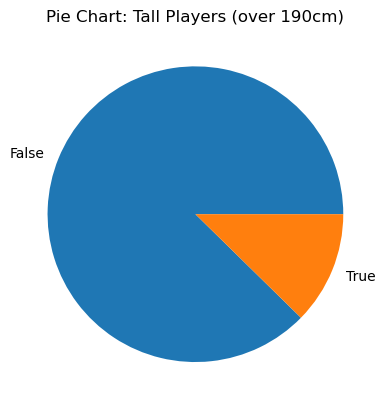

In [207]:
plt.title("Pie Chart: Tall Players (over 190cm)")
df['tall'].value_counts().plot(kind = 'pie')
plt.ylabel("")
plt.show()

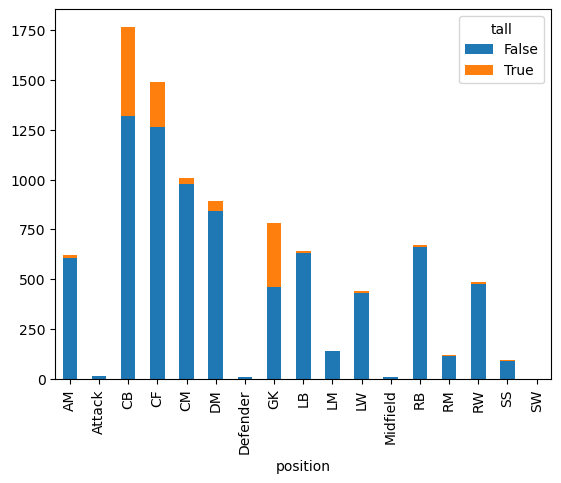

In [218]:
# Seeing the proportion of tall players per position
pd.crosstab(df['position'], df['tall']).plot(kind = 'bar', stacked = True)
plt.show()

* Center Backs, Center Forwards, and Goalkeepers have the biggest proportions and frequencies of taller players.
* Teams may prefer that players who play at the center of the field are taller in stature as compared to wing players.

In [225]:
# Heavy players over 200 pounds
df['heavy'] = df['weight'] > 180

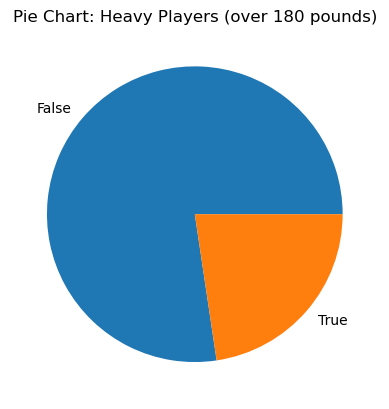

In [226]:
plt.title("Pie Chart: Heavy Players (over 180 pounds)")
df['heavy'].value_counts().plot(kind = 'pie')
plt.ylabel("")
plt.show()

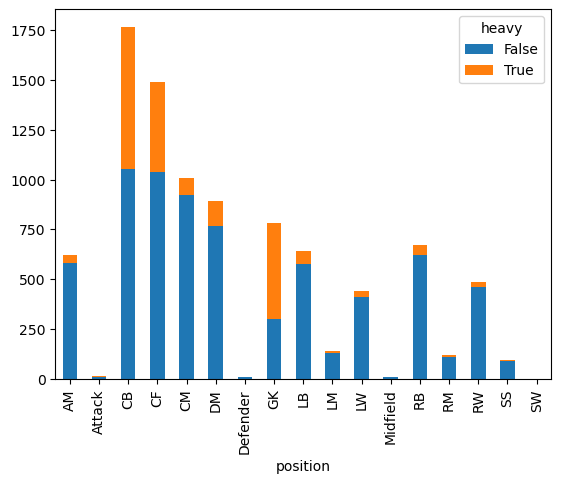

In [227]:
# Seeing the proportion of heavy players per position
pd.crosstab(df['position'], df['heavy']).plot(kind = 'bar', stacked = True)
plt.show()

* The results for heavy players are identical to the previous of tall players.
* Central playing footballers tend to be heavier, especially Goalkeepers.
* There are certain playstyles for Center Backs and Center Forwards such as the 'Target Man' which capitalize on bigger physique players in the center of the field.

# Question 7
* Question: Do certain countries do a better job of breeding certain playstyles? Italy is praised for their 3 Center Backs defensive style and Spain for their playmakers.
* Rationale: Countries may intentionally raise young players with these playstyles to fit into their national teams in the future.

In [241]:
# Let's focus on Spain, Italy, England, France, and Brazil
italy = df[df['country'] == 'Italy']
england = df[df['country'] == 'England']
france = df[df['country'] == 'France']
brazil = df[df['country'] == 'Brazil']
countries = {'ITALY': italy,
             'ENGLAND': england,
             'FRANCE': france,
             'BRAZIL': brazil}

In [252]:
for country in countries.items():
    print(country[0])
    print(country[1]['Player_Type'].value_counts())
    print()

ITALY
Player_Type
Defender (Defensive)      163
Midfielder (Defensive)    161
Forward (Attacking)       143
Goalkeeper                 80
Midfielder (Attacking)     36
Name: count, dtype: int64

ENGLAND
Player_Type
Forward (Attacking)       169
Defender (Defensive)      164
Midfielder (Defensive)    115
Goalkeeper                 45
Midfielder (Attacking)     28
Name: count, dtype: int64

FRANCE
Player_Type
Defender (Defensive)      215
Forward (Attacking)       183
Midfielder (Defensive)    150
Goalkeeper                 73
Midfielder (Attacking)     61
Name: count, dtype: int64

BRAZIL
Player_Type
Forward (Attacking)       168
Defender (Defensive)      131
Midfielder (Defensive)    110
Goalkeeper                 36
Midfielder (Attacking)     30
Name: count, dtype: int64



**According to the counts of each player type for each country:**
1. Italy, as expected, breeds a lot of Defenders type players.
2. England has a lot of Forwards and Defenders.
3. France has the biggest amount of Defenders.
4. Brazil raises a lot of Attackers.

In [247]:
for country in countries.items():
    print(country[0])
    best_position = country[1].groupby('position').agg({'overall_rating': 'mean'}).sort_values('overall_rating', ascending = False).head(1)
    print(round(best_position))
    print()

ITALY
          overall_rating
position                
SS                  77.0

ENGLAND
          overall_rating
position                
AM                  73.0

FRANCE
          overall_rating
position                
SS                  74.0

BRAZIL
          overall_rating
position                
LM                  87.0



**Here we print the top position of each country based on their highest average rated position**
1. Italy - Second Striker
2. England - Attacking Midfielder
3. France - Second Striker
4. Brazil - Left Midfielder

In [249]:
for country in countries.items():
    print(country[0])
    print(country[1]['position'].value_counts().head(1))
    print()

ITALY
position
CB    120
Name: count, dtype: int64

ENGLAND
position
CF    105
Name: count, dtype: int64

FRANCE
position
CB    133
Name: count, dtype: int64

BRAZIL
position
CB    106
Name: count, dtype: int64



**The most common position in the country**
1. Italy - Center Back
2. England - Center Forward
3. France - Center Back
4. Brazil - Center Back

# Question 8
* Question: What countries have the players with the most potential? Nations like France have dominated in recent years with regards to young talent, we can explore this using our dataset. 
* Rationale: Teams that are looking to recruit players for their youth squads can set up scouting networks in countries with high potential youth.

In [277]:
# Get the countries with at least 100 players so that our analysis is not biased 
country_counts = df['country'].value_counts()  
valid_countries = country_counts[country_counts >= 100].index 
df_filtered = df[df['country'].isin(valid_countries)]

In [280]:
# The countries that have at least 100 players
print("Countries with at least 100 players")
for country in df_filtered['country'].unique():
    print(f"- {country}")

Countries with at least 100 players
- England
- Ireland
- Germany
- Netherlands
- Scotland
- Spain
- France
- Senegal
- Italy
- Brazil
- Poland
- Serbia
- Switzerland
- Belgium
- Argentina
- Portugal


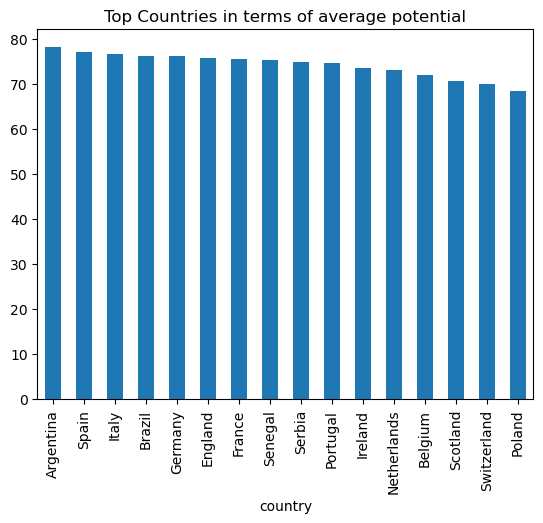

In [285]:
# The top countries in terms of average potential
plt.title("Top Countries in terms of average potential")
df_filtered.groupby('country')['potential'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

Among the countries with at least 100 players, the countries with the most potential are:
1. Argentina
2. Spain
3. Italy
* Note: high overall players in the game will also have a high potential, we need to investigate potential for only younger players

In [287]:
# Let's filter the players who are less than 30 years old
# Keep in mind, the dataset is outdated 
df_filtered_young = df_filtered[df_filtered['age'] < 30]
df_filtered_young.shape

(465, 56)

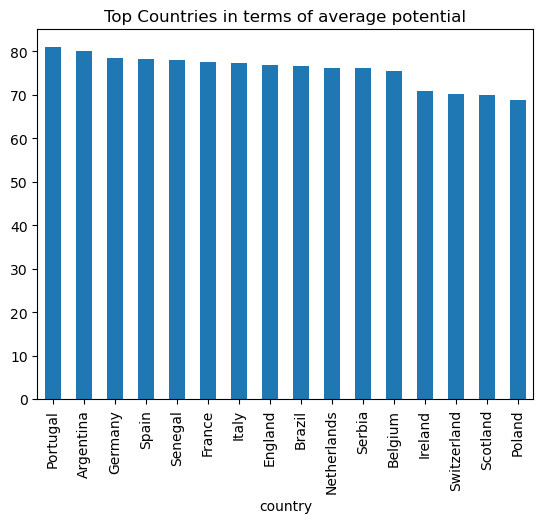

In [288]:
# The top countries in terms of average potential
plt.title("Top Countries in terms of average potential")
df_filtered_young.groupby('country')['potential'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

* Now, Portugal beats Argentina.

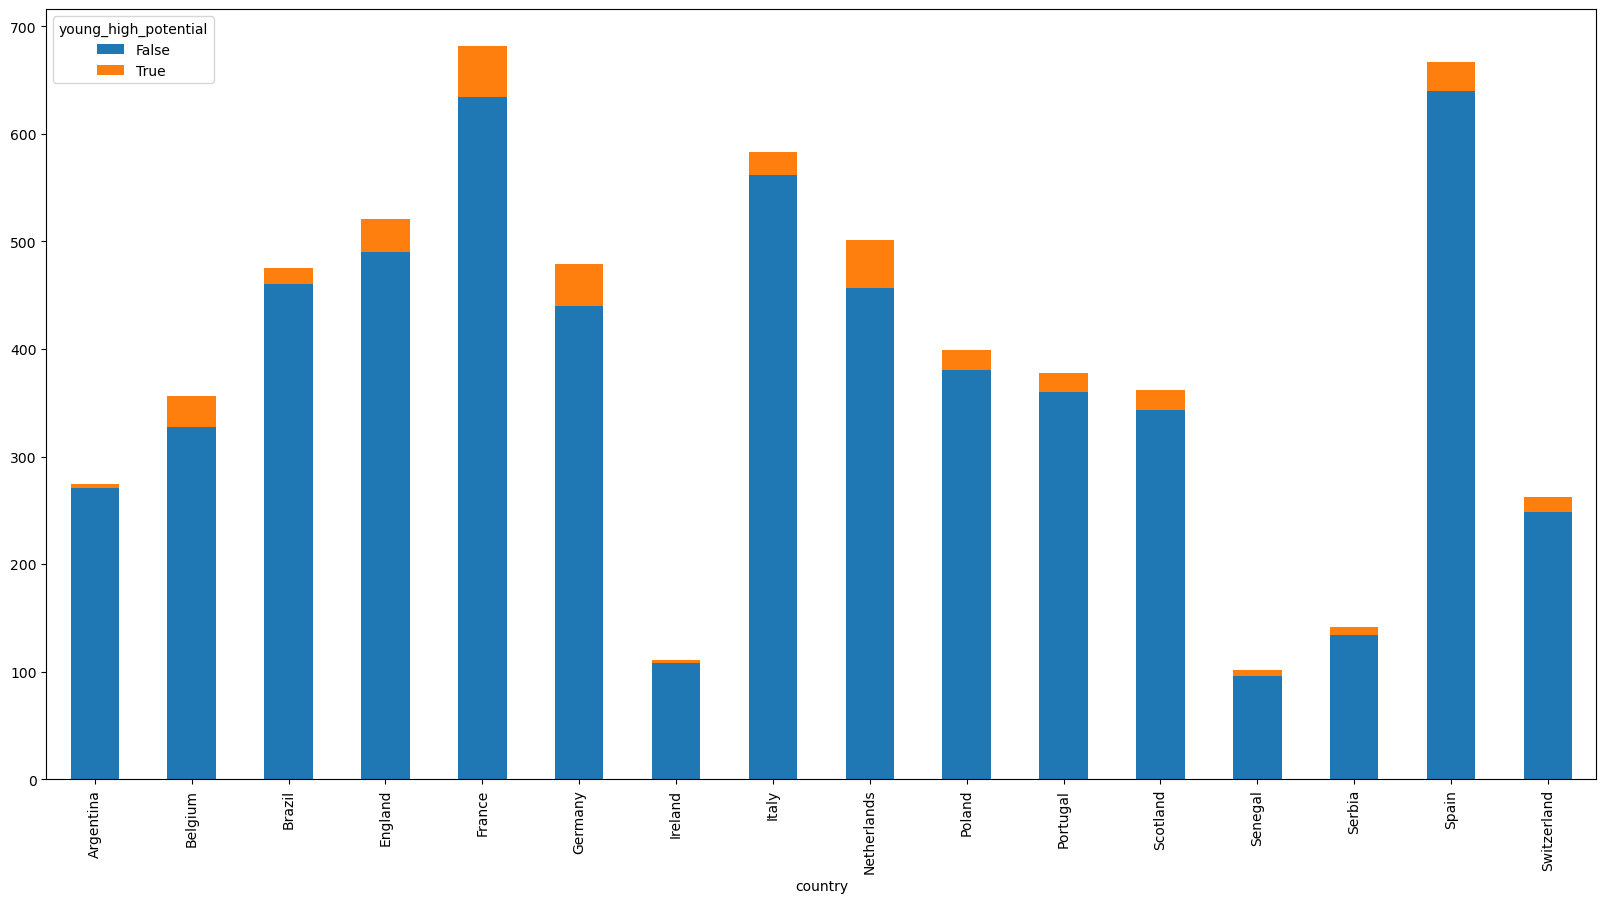

In [298]:
# Let's see high potential players
df_filtered.loc[:, 'young_high_potential'] = (df_filtered['age'] < 30) & (df_filtered['potential'] > 70)
pd.crosstab(df_filtered['country'], df_filtered['young_high_potential']).plot(kind = 'bar', stacked = True, figsize = (20, 10))
plt.show()

* According to our plot, France has the biggest amount of young, high potential players.
* Countries like Germany and Netherlands also show a bigger proportion of these types of players. 